In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from IPython.display import display

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score,roc_curve,accuracy_score,make_scorer,auc


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("Задания_1_2.xlsx", sheet_name="Training")
df.head()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,283,1,0.0,NaN,NaN,10,0,1.02273,1.01608,1.55268,...,831.68333,783.81667,171.33333,818.15000,0.62772,0.13333,0.00000,6.41893,0.97122,6.41893
1,342,0,0.0,30.00000,6.80153,0,0,1.00000,1.65348,1.14852,...,195.13889,168.30000,81.00000,NaN,6.32407,0.26667,0.33333,NaN,1.60714,3.44800
2,631,0,0.0,30.00000,9.60267,0,0,1.00000,0.84143,NaN,...,226.10556,207.41667,110.00000,184.49444,2.25635,0.00000,0.06667,NaN,0.75000,8.08000
3,1165,0,0.0,30.33333,15.32553,0,0,0.98901,0.88114,NaN,...,567.53889,441.52778,194.00000,625.32222,2.74469,0.13333,0.40000,13.50400,0.98119,13.50400
4,1469,0,0.0,28.00000,7.54133,0,0,0.92857,1.21447,0.60138,...,154.80556,86.64444,71.66667,53.45000,0.91130,0.46667,0.40000,NaN,0.40171,3.44800


In [3]:
# смотрим информацию об сэте
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10000 non-null  int64  
 1   Target  10000 non-null  int64  
 2   P1      10000 non-null  float64
 3   P2      8492 non-null   float64
 4   P3      8523 non-null   float64
 5   P4      10000 non-null  int64  
 6   P5      10000 non-null  int64  
 7   P6      10000 non-null  float64
 8   P7      10000 non-null  float64
 9   P8      8482 non-null   float64
 10  P9      10000 non-null  float64
 11  P10     10000 non-null  float64
 12  P11     10000 non-null  float64
 13  P12     10000 non-null  float64
 14  P13     10000 non-null  float64
 15  P14     10000 non-null  float64
 16  P15     10000 non-null  float64
 17  P16     8475 non-null   float64
 18  P17     10000 non-null  float64
 19  P18     10000 non-null  float64
 20  P19     10000 non-null  float64
 21  P20     10000 non-null  float64
 22 

In [4]:
df.describe()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
count,1.000000e+04,10000.000000,10000.000000,8492.000000,8523.000000,10000.000000,10000.000000,10000.000000,10000.000000,8482.000000,...,10000.000000,10000.000000,10000.000000,8496.000000,10000.000000,10000.000000,10000.000000,8467.000000,10000.000000,10000.000000
mean,5.572251e+06,0.500000,1.032911,24.972718,14.497498,2.329800,0.079200,0.950521,0.993450,0.875107,...,254.005455,204.907409,124.197333,268.877144,1.683967,0.183617,0.179254,9.048853,0.973444,10.625063
std,4.206422e+06,0.500025,3.977033,7.537203,10.703977,5.754871,0.270064,0.217456,0.223170,0.524680,...,299.695057,263.099484,137.442492,355.736543,1.997374,0.189519,0.194499,5.529335,0.528715,6.688086
min,2.830000e+02,0.000000,0.000000,1.000000,0.723030,0.000000,0.000000,0.048390,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.811950e+06,0.000000,0.000000,22.333330,8.004265,0.000000,0.000000,0.939760,0.916913,0.592615,...,52.851392,33.952780,33.000000,47.193053,0.507607,0.000000,0.000000,4.320000,0.750000,5.096000
50%,3.583642e+06,0.500000,0.000000,28.666670,12.532000,0.000000,0.000000,0.989010,0.997990,0.883840,...,150.805555,110.519445,83.166665,146.880555,1.194580,0.133330,0.133330,9.115600,1.000000,9.536000
75%,1.010481e+07,1.000000,0.000000,30.333330,18.522270,1.000000,0.000000,1.000000,1.048620,1.129363,...,348.923610,274.991665,167.000000,346.656943,2.146517,0.266670,0.266670,9.920000,1.216220,14.456000
max,1.288771e+07,1.000000,66.666670,30.333330,287.935870,30.000000,1.000000,2.437500,2.763270,3.000000,...,3803.522220,3043.930670,1625.333330,5339.972220,26.899270,1.000000,1.000000,96.288000,7.246720,97.352000


In [5]:
#датафрэйм сбалансирован
df["Target"].value_counts()

1    5000
0    5000
Name: Target, dtype: int64

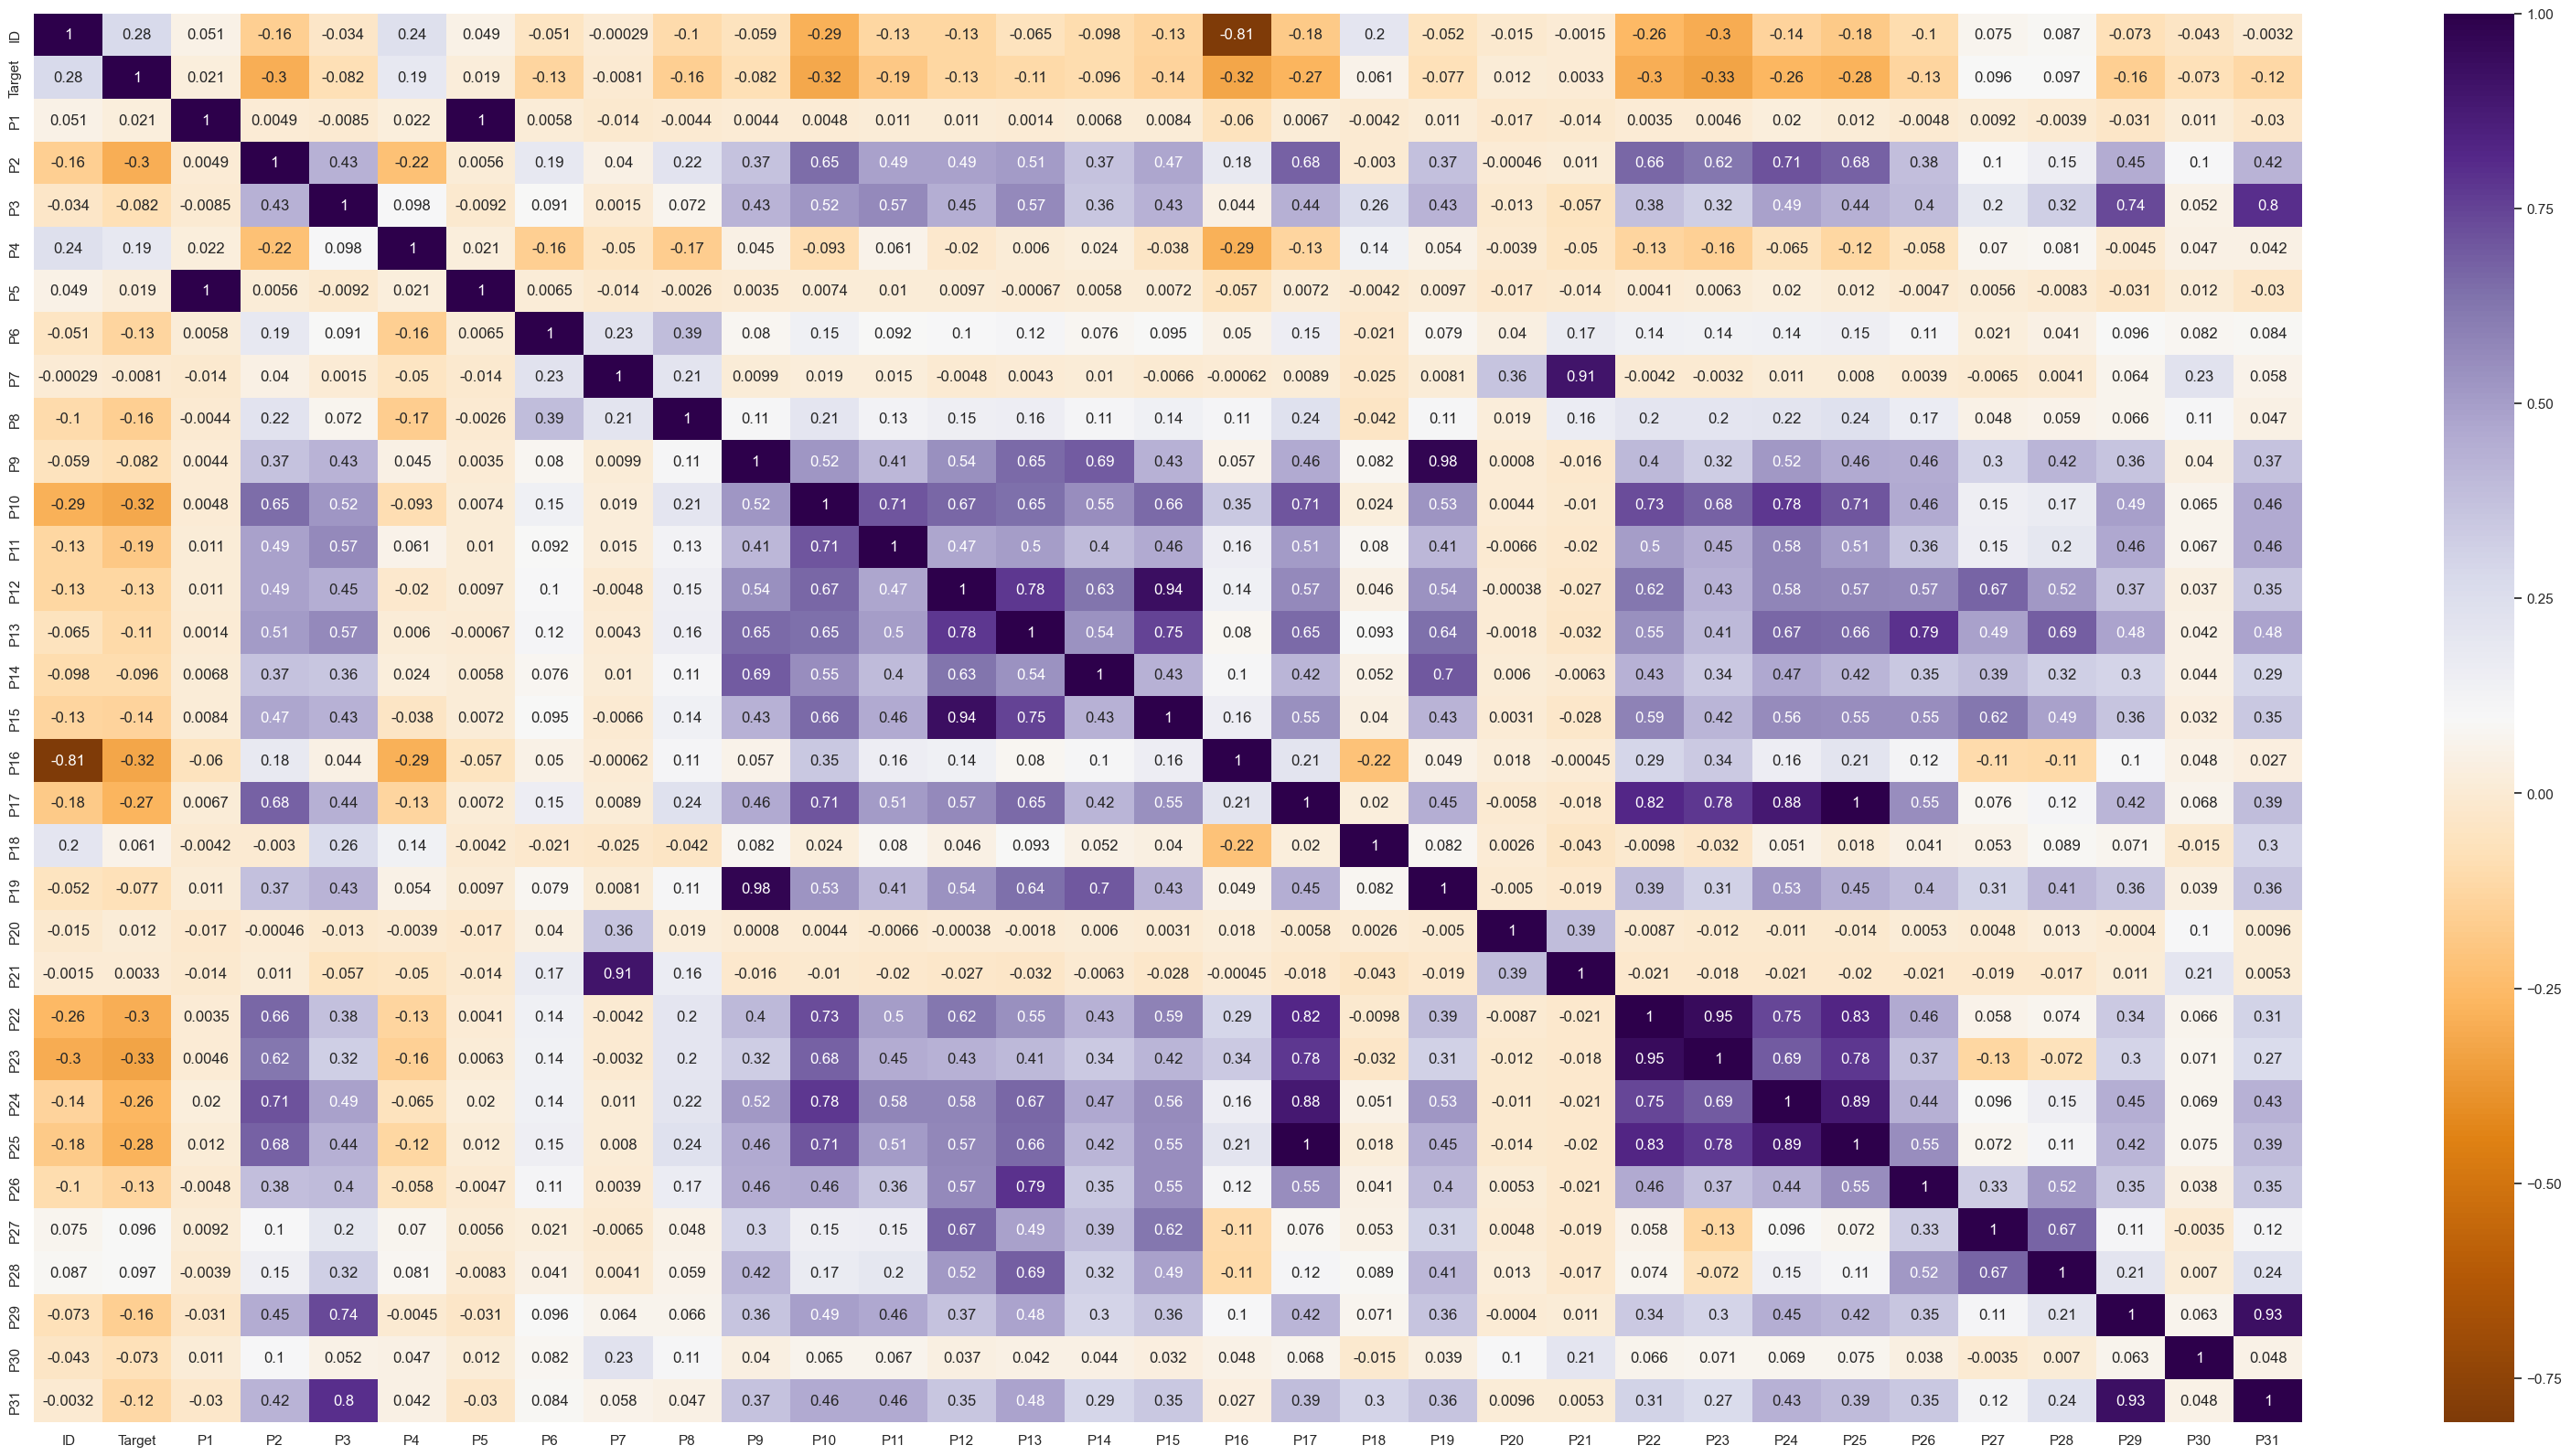

In [6]:
# посмотрим корреляцию данных
sns.set()
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(df.corr('spearman'), cmap='PuOr', annot=True, ax=ax)

In [7]:
corr = df.corr()
c = corr.abs().unstack()
c[c == 1] = 0
c = c.sort_values(ascending=False).drop_duplicates()
tmp = c.head(10)
tmp.sort_values(ascending=True)
tmp

P25  P17    0.997923
P22  P23    0.937124
P29  P31    0.908273
P5   P1     0.885616
P12  P15    0.876695
P16  ID     0.854313
P25  P24    0.770962
P24  P17    0.764458
P19  P9     0.736083
P28  P27    0.734203
dtype: float64

In [8]:
# заменим сильно коррелируемые данные на их произведение и удалим их
def prepare_df(data):
    df = data.copy()
    del df['ID']
    # вставялем пропущенные значения средними
    df['P2'].fillna(df['P2'].mean(), inplace=True)
    df['P3'].fillna(df['P3'].mean(), inplace=True)
    df['P8'].fillna(df['P8'].mean(), inplace=True)
    df['P16'].fillna(df['P16'].mean(), inplace=True)
    df['P25'].fillna(df['P25'].mean(), inplace=True)
    df['P29'].fillna(df['P29'].mean(), inplace=True)
    df["P22_23"] = df["P23"]*df["P22"]
    df["P17_25"] = df["P25"]*df["P17"]
    df["P1_5"] = df["P1"]*df["P5"]
    df["P12_15"] = df["P12"]*df["P15"]
    df["P29_31"] = df["P31"]*df["P29"]
    df = df.drop(labels=['P1', 'P5', 'P12', 'P15', 'P17',
                 'P22', 'P23', 'P25', 'P29', 'P31'], axis=1)
    return df


In [9]:
data = prepare_df(df)


In [10]:
data.head()


,Target,P2,P3,P4,P6,P7,P8,P9,P10,P11,...,P24,P26,P27,P28,P30,P22_23,P17_25,P1_5,P12_15,P29_31
0,1,24.972718,14.497498,10,1.02273,1.01608,1.552680,1.15000,30.00000,123.00000,...,171.33333,0.62772,0.13333,0.00000,0.97122,651887.258215,670356.659560,0.0,1740.809605,41.202662
1,0,30.000000,6.801530,0,1.00000,1.65348,1.148520,0.40556,9.00000,78.00000,...,81.00000,6.32407,0.26667,0.33333,1.60714,32841.875187,85130.986028,0.0,563.798431,31.200444
2,0,30.000000,9.602670,0,1.00000,0.84143,0.875107,0.00000,28.66667,12.66667,...,110.00000,2.25635,0.00000,0.06667,0.75000,46898.062324,34037.993602,0.0,177.223386,73.114729
3,0,30.333330,15.325530,0,0.98901,0.88114,0.875107,2.68333,61.66667,112.33333,...,194.00000,2.74469,0.13333,0.40000,0.98119,250584.186165,391028.572933,0.0,13411.279416,182.358016
4,0,28.000000,7.541330,0,0.92857,1.21447,0.601380,0.00000,26.00000,89.00000,...,71.66667,0.91130,0.46667,0.40000,0.40171,13413.041055,2856.902500,0.0,4478.583530,31.200444


In [11]:
corr_data = data.corr()
c = corr_data.abs().unstack()
c[c == 1] = 0
c = c.sort_values(ascending=False).drop_duplicates()
tmp = c.head(10)
tmp.sort_values(ascending=True)
tmp

P9   P19       0.736083
P27  P28       0.734203
P24  P10       0.701991
P21  P7        0.671608
P20  P21       0.601580
P13  P9        0.564791
     P17_25    0.553426
P24  P17_25    0.503257
P11  P10       0.498751
P13  P19       0.494619
dtype: float64

In [12]:
X = data.drop(columns=['Target'])
y = data['Target']


In [13]:
# разбиваем данные на тренировочные тестовые и валидационные данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=232)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=232)


In [14]:
# создаём функцию  построения моделей используя GridsearchCV и вывода метрик на тенировочных данных

def fit_classifier(model, X, y, parameters=None, scorer_metrics=None):

    # Perform grid search on the classifier using scorer_metrics as the scoring method
    grid_obj = GridSearchCV(estimator=model, param_grid=parameters,
                            scoring=make_scorer(scorer_metrics), cv=5)

    # Fit the grid search object to the training data and find the optimal parameters using fit()
    grid_fit = grid_obj.fit(X, y)

    # Get the estimator
    model_estimator = grid_fit.best_estimator_

    # Report the metrics scores on train data
    model_estimator.fit(X, y)
    y_pred = model_estimator.predict(X)

    print("\n")
    print("\nModel performance on training set\n------------------------")
    print("Final accuracy score on the training data: {:.4f}".format(
        accuracy_score(y, y_pred)))
    print("Final precision score on training data: {:.4f}".format(
        precision_score(y, y_pred)))
    print("Final Recall score on training data: {:.4f}".format(
        recall_score(y, y_pred)))
    print("Final ROC AUC score on training data: {:.4f}".format(
        roc_auc_score(y, y_pred)))
    print("\n")
    print("The best parameters are: {}".format(model_estimator))

    return model_estimator


In [15]:
# построение графика ROC
def roc_auc_plot(model, X, y, label=None):

    y_score = model.predict_proba(X)[:, 1]

    roc = roc_curve(y, y_score)

    plt.plot(roc[0], roc[1], label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')

    roc_score = auc(roc[0], roc[1])
    print('AUC score of %s is %.4f.' % (label, roc_score))


In [16]:
def plot_roc_curve(y, pred):
    roc_score = roc_auc_score(y, pred)

    fpr, tpr, threshold = roc_curve(y, pred)

    plt.figure(figsize=(6, 5))
    lw = 2
    plt.title('ROC-кривая, %2.1f%%' % (100*roc_score), fontsize=14)
    plt.plot(fpr, tpr, color='darkorange', lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.show()


In [17]:
# строим наилучшую модель для логистической регресии
parameters_LR = {'C': [0.0001, 0.0003, 0.0005], 'penalty': ['l1', 'l2']}

model_LR = fit_classifier(LogisticRegression(random_state=18), X_train, y_train,
                          parameters=parameters_LR, scorer_metrics=recall_score)





Model performance on training set
------------------------
Final accuracy score on the training data: 0.5643
Final precision score on training data: 0.7199
Final Recall score on training data: 0.2196
Final ROC AUC score on training data: 0.5665


The best parameters are: LogisticRegression(C=0.0001, random_state=18)


In [18]:
#  строим наилучшую модель для random forest
from sklearn.ensemble import RandomForestClassifier
# Create the parameters list
parameters_RF = {'max_depth': [2, 5, 7, 10], 'min_samples_leaf': [
    2, 3, 5, 7, 10], 'min_samples_split': [2, 3, 5, 10]}

model_RF = fit_classifier(RandomForestClassifier(random_state=18), X_train, y_train,
                          parameters=parameters_RF, scorer_metrics=recall_score)





Model performance on training set
------------------------
Final accuracy score on the training data: 0.8170
Final precision score on training data: 0.8350
Final Recall score on training data: 0.7930
Final ROC AUC score on training data: 0.8172


The best parameters are: RandomForestClassifier(max_depth=10, min_samples_leaf=7, random_state=18)


In [19]:
# строим наилучшую модель для DecisionTree
parameters_DT = {'max_depth': [7, 8, 9],
                 'min_samples_leaf': [2, 3, 4],
                 'min_samples_split': [2, 3, 4]}

model_DT = fit_classifier(DecisionTreeClassifier(random_state=44), X_train, y_train,
                          parameters=parameters_DT, scorer_metrics=recall_score)





Model performance on training set
------------------------
Final accuracy score on the training data: 0.7293
Final precision score on training data: 0.7487
Final Recall score on training data: 0.6956
Final ROC AUC score on training data: 0.7295


The best parameters are: DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, random_state=44)


AUC score of Logistic Regression is 0.6800.
AUC score of Decision Tree is 0.8119.
AUC score of Random Forest is 0.9022.


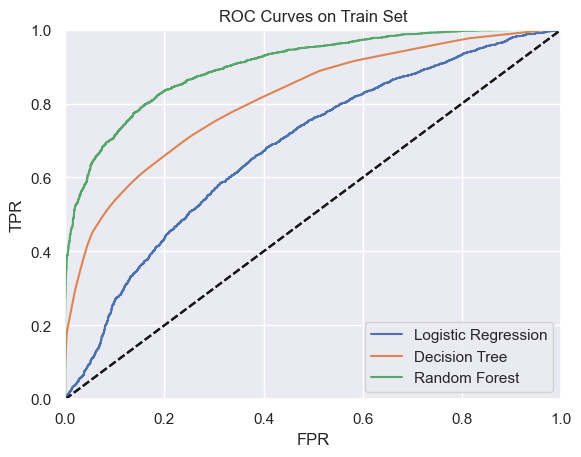

In [20]:
# построение ROC кривых для всех моделей на тренировочном датасэте
roc_auc_plot(model_LR, X_train, y_train, label='Logistic Regression')
roc_auc_plot(model_DT, X_train, y_train, label='Decision Tree')
roc_auc_plot(model_RF, X_train, y_train, label='Random Forest')
plt.title('ROC Curves on Train Set')
plt.legend(loc='lower right')
plt.show()


AUC score of Logistic Regression is 0.6889.
AUC score of Decision Tree is 0.6965.
AUC score of Random Forest is 0.7620.


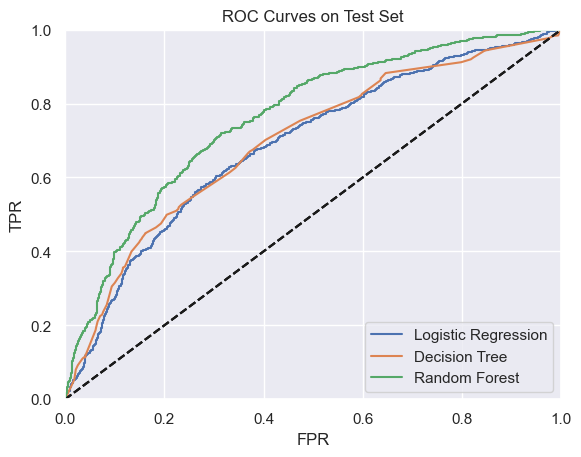

In [21]:
# построение ROC кривых для всех моделей на тестовом датасэте
roc_auc_plot(model_LR, X_test, y_test, label='Logistic Regression')
roc_auc_plot(model_DT, X_test, y_test, label='Decision Tree')
roc_auc_plot(model_RF, X_test, y_test, label='Random Forest')
plt.title('ROC Curves on Test Set')
plt.legend(loc='lower right')
plt.show()


AUC score of Logistic Regression is 0.6842.
AUC score of Decision Tree is 0.6925.
AUC score of Random Forest is 0.7577.


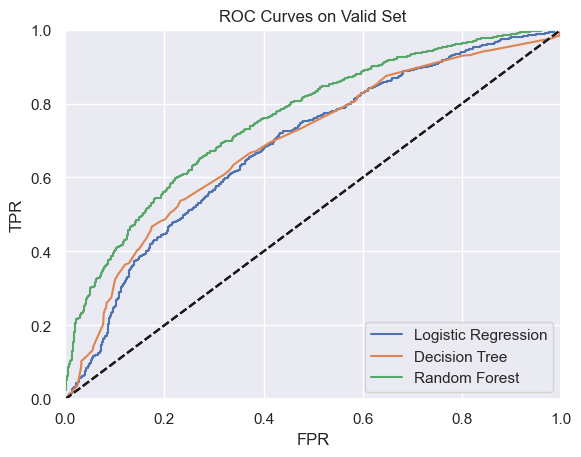

In [22]:
roc_auc_plot(model_LR, X_val, y_val, label='Logistic Regression')
roc_auc_plot(model_DT, X_val, y_val, label='Decision Tree')
roc_auc_plot(model_RF, X_val, y_val, label='Random Forest')
plt.title('ROC Curves on Valid Set')
plt.legend(loc='lower right')
plt.show()


In [23]:
model_RF.fit(X, y)

pred = model_RF.predict_proba(X)[:, 1]
print("Total ROC AUC: %.2f" % roc_auc_score(y, pred))


Total ROC AUC: 0.88


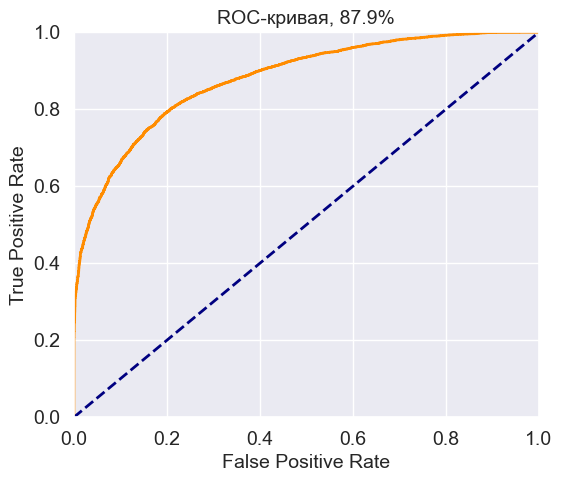

In [24]:
plot_roc_curve(y, pred)


In [25]:
def show_confusion_matrix(X, y, model, threshold=0.5):
    pred = model.predict_proba(X)[:, 1]
    pred = [1 if p >= threshold else 0 for p in pred]
    cm = pd.DataFrame(confusion_matrix(y, pred),
                      index=["actual 0", "actual 1"], columns=["pred 0", "pred 1"])
    print("Threshold = %.2f" % threshold)
    print("Accuracy score: %.1f%%" % (100 * accuracy_score(y, pred)))
    print("Confusion matrix:")
    display(cm)


show_confusion_matrix(X, y, model_RF, threshold=.6)


Threshold = 0.60
Accuracy score: 76.7%
Confusion matrix:


,pred 0,pred 1
actual 0,4655,345
actual 1,1982,3018


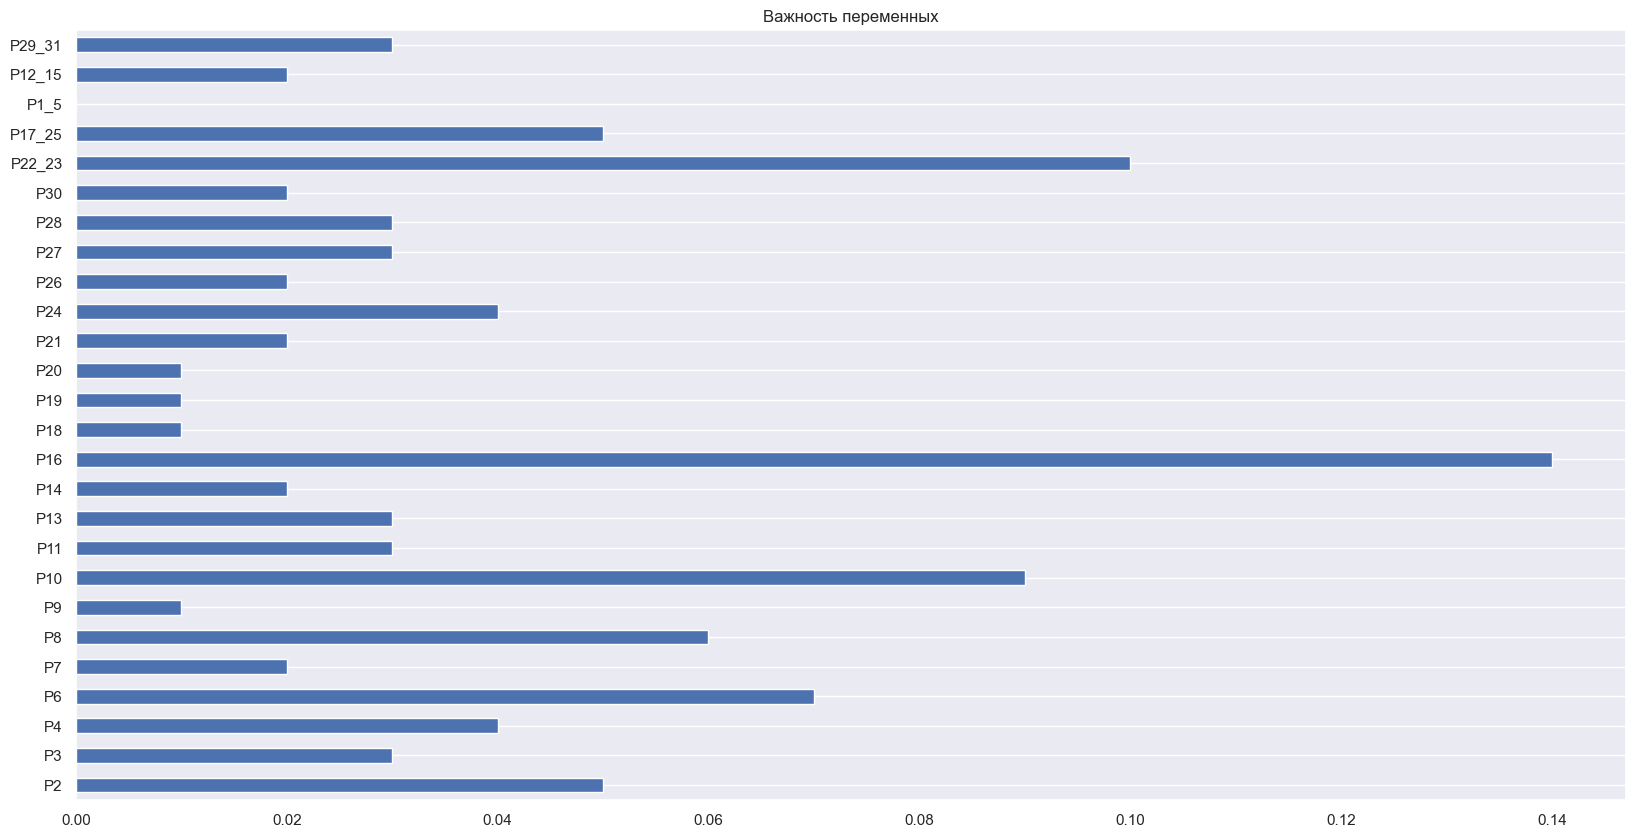

In [26]:
# создание словаря для переменных
def importances_dict(columns, model):
    importances = dict()
    for col, importance in zip(columns, model.feature_importances_):
        importances[col] = importance.round(2)
    return importances
# построение графика важности переменных


def plot_importances(importances):
    fig, ax = plt.subplots(figsize=(20, 10))
    pd.Series(importances).plot(kind='barh', ax=ax)
    plt.title("Важность переменных")
    plt.grid(axis="x")
    plt.show()


plt.rcParams.update({'font.size': 12})
plot_importances(importances_dict(X.columns, model_RF))


In [27]:
valid_df = pd.read_excel("Задания_1_2.xlsx", sheet_name="Validate")
valid_df.head()


,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,127,NaN,0.0,30.33333,8.86883,0,0,0.98901,1.01885,1.31226,...,85.59444,32.45000,41.00000,95.39444,4.64779,0.40000,0.73333,8.256,0.11725,8.256
1,214,NaN,0.0,30.33333,12.82570,0,0,0.98901,0.96587,0.94475,...,809.37778,787.77778,164.66667,239.95000,2.34907,0.00000,0.00000,4.320,1.33333,10.000
2,542,NaN,0.0,9.00000,5.25643,0,0,0.88889,0.97863,1.68000,...,26.34444,25.89444,1.33333,1.26667,0.43333,0.13333,0.06667,5.096,1.16688,5.096
3,674,NaN,0.0,24.33333,NaN,0,0,0.90411,0.88409,0.58490,...,116.31111,73.20000,27.33333,34.62222,0.69722,0.33333,0.13333,4.712,1.80000,4.712
4,756,NaN,0.0,30.33333,21.90167,0,0,0.98901,1.02636,1.30082,...,275.16111,201.13889,285.00000,369.42778,1.36109,0.13333,0.13333,21.096,0.00000,21.096


In [28]:
id_col = "ID"
ind_col = valid_df[id_col]


In [29]:
valid_df = prepare_df(valid_df)


In [30]:
valid_df.head()


,Target,P2,P3,P4,P6,P7,P8,P9,P10,P11,...,P24,P26,P27,P28,P30,P22_23,P17_25,P1_5,P12_15,P29_31
0,NaN,30.33333,8.868830,0,0.98901,1.01885,1.31226,32.55556,25.00000,52.33333,...,41.00000,4.64779,0.40000,0.73333,0.11725,2777.539578,9099.993295,0.0,858.803003,68.161536
1,NaN,30.33333,12.825700,0,0.98901,0.96587,0.94475,2.72222,73.33333,753.00000,...,164.66667,2.34907,0.00000,0.00000,1.33333,637609.830710,57576.002500,0.0,125.724416,43.200000
2,NaN,9.00000,5.256430,0,0.88889,0.97863,1.68000,0.43333,6.00000,15.00000,...,1.33333,0.43333,0.13333,0.06667,1.16688,682.174521,1.604453,0.0,0.202500,25.969216
3,NaN,24.33333,15.227795,0,0.90411,0.88409,0.58490,2.07778,22.66667,32.66667,...,27.33333,0.69722,0.33333,0.13333,1.80000,8513.973252,1198.621256,0.0,1015.457971,22.202944
4,NaN,30.33333,21.901670,0,0.98901,1.02636,1.30082,42.82778,49.33333,104.33333,...,285.00000,1.36109,0.13333,0.13333,0.00000,55345.600237,136476.474571,0.0,1633.001607,445.041216


In [31]:
X_final = valid_df.drop(columns=['Target'])


In [32]:
pred = model_RF.predict(X_final)

pred = pd.DataFrame({id_col: ind_col, "prediction": pred})
pred.head()


,ID,prediction
0,127,1
1,214,0
2,542,1
3,674,0
4,756,0


In [33]:
pred.to_csv("validate_scores.csv", index=False)